In [50]:
from fire_evacuation.model import *
from fire_evacuation.agent import *
from matplotlib.colors import LinearSegmentedColormap
import matplotlib

%matplotlib inline
matplotlib.rcParams['font.size'] = 20

model = FireEvacuation(
        floor_size = 20,
        human_count = 50,
        visualise_vision = False,
        random_spawn = True,
        save_plots = False)

uniks = LinearSegmentedColormap.from_list( 'unik', [np.array((199,16,92))/255,  np.array((74,172,150))/255, 
                                                  np.array((234,195,114))/255, np.array((80,149,200))/255])

In [46]:
def show_dynamics(model):
    """
    Run an experiment with a given model, and plot the results.
    """
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    model.run(10)
    model.datacollector.get_model_vars_dataframe().plot(ax=ax2, colormap=uniks)

In [57]:
def draw_grid(model, ax=None):
    """
    Draw the current composition of the grid
    """
    global grid
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))
    grid = np.zeros((model.grid.width, model.grid.height))
    for agents, x, y in model.grid.coord_iter():
        for agent in agents:
            if type(agent) is FireExit:
                grid[x,y] = 2
            elif type(agent) is Wall:
                grid[x,y] = 3
            elif type(agent) is Human:
                grid[x,y] = 1
            else:
                grid[x,y] = 0
    ax.pcolormesh(grid, cmap=uniks, vmin=0, vmax=3)
    #ax.pcolormesh(grid)
    ax.axis("off")
    ax.set_title("Steps: {}".format(model.schedule.steps))

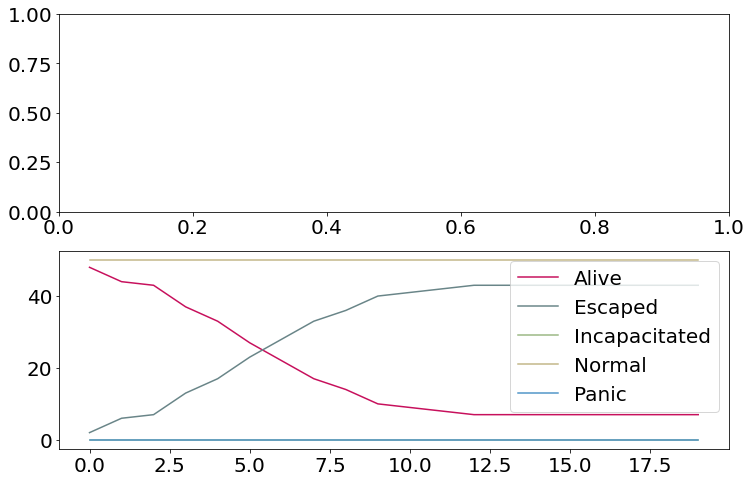

In [58]:
show_dynamics(model)

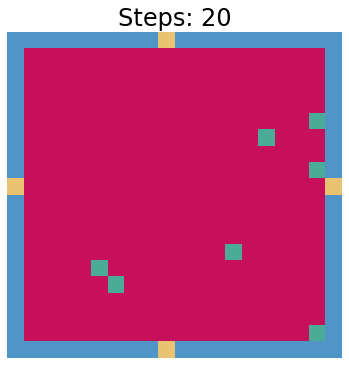

In [59]:
draw_grid(model)